In [1]:
import pandas as pd
import os
import shutil
import cv2
from multiprocessing import Pool
import time
import gc
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import tensorflow as tf
import PIL
from PIL import Image
import imageio
import logging as log
import tarfile
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
Inception_ResNetV2_MODEL=tf.keras.applications.InceptionResNetV2(input_shape=(128,128,3),
                                               include_top=False,
                                               weights='imagenet')

In [4]:
Inception_ResNetV2_MODEL.layers[204].name

'conv2d_54'

In [5]:
for layer in Inception_ResNetV2_MODEL.layers[:204]:
    layer.trainable=False

In [6]:
Inception_ResNetV2_MODEL.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 63, 63, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 63, 63, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 63, 63, 32)   0           batch_normalization[0][0]        
________________________________________________________________________________

In [7]:
model=tf.keras.models.Sequential([
                                  Inception_ResNetV2_MODEL,
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512, activation='relu'),
                                  tf.keras.layers.Dense(92740, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 2, 2, 1536)        54336736  
_________________________________________________________________
flatten (Flatten)            (None, 6144)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               3146240   
_________________________________________________________________
dense_1 (Dense)              (None, 92740)             47575620  
Total params: 105,058,596
Trainable params: 103,663,076
Non-trainable params: 1,395,520
_________________________________________________________________


In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
!pwd

/cygdrive/c/Apps/jupyterWorkspace/google_landmark_detection/Models


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=50,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

#flow training images in batches of 128
train_generator = train_datagen.flow_from_directory(
    '../datasets/set_128/train/',
    target_size=(128,128),
    batch_size=256,
    class_mode='categorical'
)
history = model.fit_generator(
    train_generator,
    epochs = 10,
    verbose=1
)

Found 3064239 images belonging to 92740 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 11970 steps
Epoch 1/10
11970/11970 [==============================] - 8369s 699ms/step - loss: 10.6007 - accuracy: 6.7684e-04
Epoch 2/10
11970/11970 [==============================] - 7903s 660ms/step - loss: 9.3086 - accuracy: 0.0063
Epoch 3/10
11970/11970 [==============================] - 7820s 653ms/step - loss: 8.5264 - accuracy: 0.0184
Epoch 4/10
11970/11970 [==============================] - 7851s 656ms/step - loss: 8.1374 - accuracy: 0.0297
Epoch 5/10
11970/11970 [==============================] - 7985s 667ms/step - loss: 7.6455 - accuracy: 0.0486
Epoch 6/10
11970/11970 [==============================] - 7820s 653ms/step - loss: 7.2756 - accuracy: 0.0683
Epoch 7/10
11970/11970 [==============================] - 7837s 655ms/step - loss: 6.9691 - accuracy: 0.0871
Epoch 8/10
11970/11970 [==============================] - 78

In [14]:
history1 = history.model.fit_generator(
    train_generator,
    epochs = 10,
    verbose=1
)

  ...
    to  
  ['...']
Train for 11970 steps
Epoch 1/10
11970/11970 [==============================] - 11243s 939ms/step - loss: 6.2814 - accuracy: 0.1399
Epoch 2/10
11970/11970 [==============================] - 7984s 667ms/step - loss: 6.1448 - accuracy: 0.1511
Epoch 3/10
11970/11970 [==============================] - 7936s 663ms/step - loss: 6.0093 - accuracy: 0.1629
Epoch 4/10
11970/11970 [==============================] - 7901s 660ms/step - loss: 5.9495 - accuracy: 0.1688
Epoch 5/10
11970/11970 [==============================] - 7912s 661ms/step - loss: 5.8143 - accuracy: 0.1803
Epoch 6/10
11970/11970 [==============================] - 7900s 660ms/step - loss: 5.7543 - accuracy: 0.1861
Epoch 7/10
11970/11970 [==============================] - 7883s 659ms/step - loss: 5.7306 - accuracy: 0.1893
Epoch 8/10
11970/11970 [==============================] - 7879s 658ms/step - loss: 5.5679 - accuracy: 0.2036
Epoch 9/10
11970/11970 [==============================] - 8057s 673ms/step - los

In [17]:
history2 = history1.model.fit_generator(
    train_generator,
    epochs = 20,
    verbose=1
)

  ...
    to  
  ['...']
Train for 11970 steps
Epoch 1/20
11970/11970 [==============================] - 7847s 656ms/step - loss: 5.7149 - accuracy: 0.1901
Epoch 2/20
11970/11970 [==============================] - 7882s 658ms/step - loss: 5.8548 - accuracy: 0.1794
Epoch 3/20
11970/11970 [==============================] - 7874s 658ms/step - loss: 5.9469 - accuracy: 0.1724
Epoch 4/20
11970/11970 [==============================] - 7875s 658ms/step - loss: 5.7960 - accuracy: 0.1861
Epoch 5/20
11970/11970 [==============================] - 7879s 658ms/step - loss: 5.6843 - accuracy: 0.1955
Epoch 6/20
11970/11970 [==============================] - 7872s 658ms/step - loss: 5.5689 - accuracy: 0.2067
Epoch 7/20
11970/11970 [==============================] - 7856s 656ms/step - loss: 5.5047 - accuracy: 0.2124
Epoch 8/20
11970/11970 [==============================] - 7876s 658ms/step - loss: 5.5859 - accuracy: 0.2055
Epoch 9/20
11970/11970 [==============================] - 7855s 656ms/step - loss

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

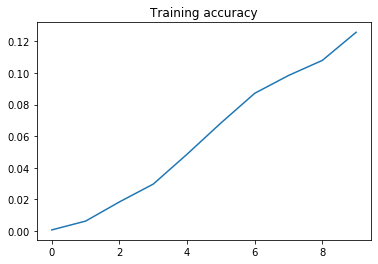

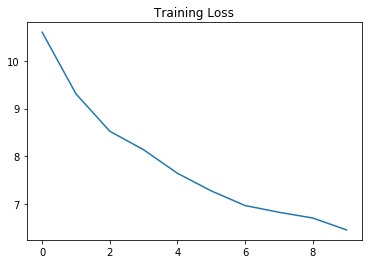

<Figure size 432x288 with 0 Axes>

In [11]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))

plt.plot(epochs, acc)
plt.title('Training accuracy')
plt.figure()

plt.plot(epochs, loss)
plt.title('Training Loss')
plt.figure()

<Figure size 432x288 with 0 Axes>

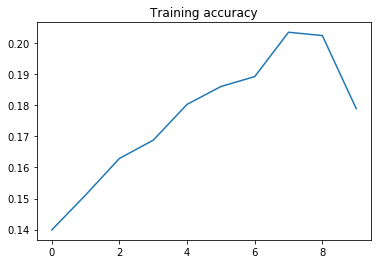

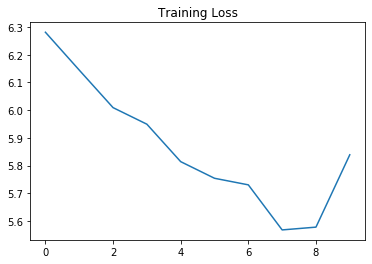

<Figure size 432x288 with 0 Axes>

In [16]:
acc = history1.history['accuracy']
loss = history1.history['loss']
epochs = range(len(acc))

plt.plot(epochs, acc)
plt.title('Training accuracy')
plt.figure()

plt.plot(epochs, loss)
plt.title('Training Loss')
plt.figure()

In [18]:
acc = history2.history['accuracy']
loss = history2.history['loss']
epochs = range(len(acc))

plt.plot(epochs, acc)
plt.title('Training accuracy')
plt.figure()

plt.plot(epochs, loss)
plt.title('Training Loss')
plt.figure()

NameError: name 'history2' is not defined